<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_5_5_padding_stride_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torch import nn 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.ToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1)
img, _ = next(iter(train_dataloader))

#Padding

In [ ]:
pad_layer = nn.ZeroPad2d(1)
A = torch.arange(1,10).reshape(3,3)
print(A,pad_layer(A), sep='\n')

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[0, 0, 0, 0, 0],
        [0, 1, 2, 3, 0],
        [0, 4, 5, 6, 0],
        [0, 7, 8, 9, 0],
        [0, 0, 0, 0, 0]])


In [ ]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=1,
                       kernel_size=(3, 5), padding="same")
img2 = conv_layer(img)
img2.size()

torch.Size([1, 1, 28, 28])

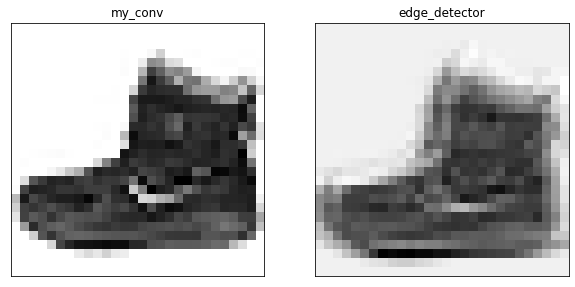

In [ ]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)
axes[0].imshow(img.squeeze().detach(), cmap='Greys')
axes[0].set_title("my_conv")
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)


axes[1].imshow(img2.detach().squeeze().detach(), cmap='Greys')
axes[1].set_title("edge_detector")
axes[1].axes.get_xaxis().set_visible(False)
axes[1].axes.get_yaxis().set_visible(False)

#Bias

In [ ]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=1,
                       kernel_size=(2, 3), padding="same")
for params in conv_layer.named_parameters():
  print(params)

('weight', Parameter containing:
tensor([[[[-0.2234, -0.3234,  0.2377],
          [-0.1931,  0.2323,  0.1304]]]], requires_grad=True))
('bias', Parameter containing:
tensor([0.3729], requires_grad=True))


#Stride

In [ ]:
downsample = nn.Conv2d(in_channels=1, out_channels=1,
                       bias=False, kernel_size=(1, 1),
                       stride=(2,3))
with torch.no_grad():
  downsample.weight[:] = torch.tensor(1.).reshape(1,1,1,1)
A = torch.arange(25,dtype=torch.float).reshape(1,1,5,5)
print(A, downsample(A), sep='\n')

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])
tensor([[[[ 0.,  3.],
          [10., 13.],
          [20., 23.]]]], grad_fn=<ConvolutionBackward0>)


torch.Size([1, 1, 26, 26])


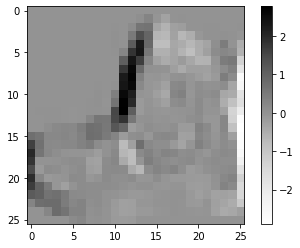

In [ ]:
edge_detector1 = nn.Conv2d(in_channels=1, out_channels=1,
                       bias=False, kernel_size=(3, 3),
                       stride=(1,1))
with torch.no_grad():
  edge_detector1.weight[:] = torch.tensor(
      [[-1., 0, 1],
       [-1, 0, 1],
       [-1, 0, 1]]).reshape(1,1,3,3)
img2 = edge_detector1(img)
print(img2.size())
plt.imshow(img2.squeeze().detach(), cmap='Greys');
plt.colorbar();

torch.Size([1, 1, 9, 7])


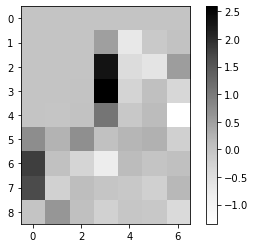

In [ ]:
edge_detector2 = nn.Conv2d(in_channels=1, out_channels=1,
                       bias=False, kernel_size=(3, 3),
                       stride=(3,4))
with torch.no_grad():
  edge_detector2.weight[:] = torch.tensor(
      [[-1., 0, 1],
       [-1, 0, 1],
       [-1, 0, 1]]).reshape(1,1,3,3)
img3 = edge_detector2(img)
print(img3.size())
plt.imshow(img3.squeeze().detach(), cmap='Greys');
plt.colorbar();

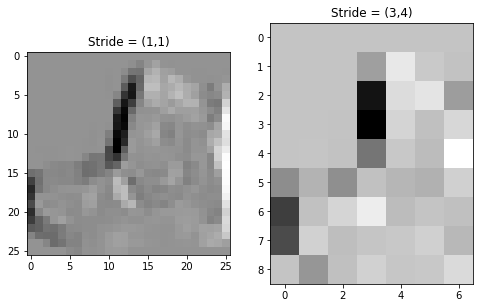

In [ ]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(8)

axes[0].imshow(img2.squeeze().detach(),cmap='Greys')
axes[0].set_title("Stride = (1,1)")


axes[1].imshow(img3.squeeze().detach(),cmap='Greys')
axes[1].set_title("Stride = (3,4)");

#Pooling

In [ ]:
pool = nn.MaxPool2d(kernel_size=(2,3))
A = torch.arange(40, dtype=torch.float).reshape(1,1,5,8)
print(A,pool(A), sep='\n')

tensor([[[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20., 21., 22., 23.],
          [24., 25., 26., 27., 28., 29., 30., 31.],
          [32., 33., 34., 35., 36., 37., 38., 39.]]]])
tensor([[[[10., 13.],
          [26., 29.]]]])


In [ ]:
pool = nn.MaxPool2d(kernel_size=(2,3), ceil_mode=True)
print(A, pool(A), sep='\n')

tensor([[[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20., 21., 22., 23.],
          [24., 25., 26., 27., 28., 29., 30., 31.],
          [32., 33., 34., 35., 36., 37., 38., 39.]]]])
tensor([[[[10., 13., 15.],
          [26., 29., 31.],
          [34., 37., 39.]]]])


In [ ]:
pool = nn.MaxPool2d(kernel_size=(2,3), stride=1, ceil_mode=True)
print(A, pool(A), sep='\n')

tensor([[[[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11., 12., 13., 14., 15.],
          [16., 17., 18., 19., 20., 21., 22., 23.],
          [24., 25., 26., 27., 28., 29., 30., 31.],
          [32., 33., 34., 35., 36., 37., 38., 39.]]]])
tensor([[[[10., 11., 12., 13., 14., 15.],
          [18., 19., 20., 21., 22., 23.],
          [26., 27., 28., 29., 30., 31.],
          [34., 35., 36., 37., 38., 39.]]]])


In [ ]:
edge_detector2 = nn.Conv2d(in_channels=1, out_channels=2,
                       bias=False, kernel_size=(3, 3),
                       stride=(1,1))

with torch.no_grad():
  edge_detector2.weight[:]=torch.tensor(
    [[[-1.,-1,-1],
      [0,0,0],
      [1,1,1]],
     
     [[-1,0,1],
      [-1,0,1],
      [-1,0,1]]]).reshape(2,1,3,3)

block = nn.Sequential(edge_detector2,
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=(3,3),
                                 ceil_mode=True))

In [ ]:
edges_detected = edge_detector2(img)
print(edges_detected.size())
edges_detected_block = block(img)
print(edges_detected_block.size())

torch.Size([1, 2, 26, 26])
torch.Size([1, 2, 9, 9])


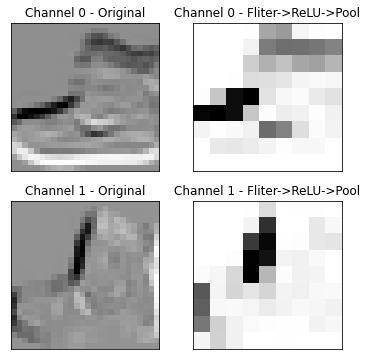

In [ ]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(6)

axes[0,0].imshow(edges_detected[0,0,...].detach(), cmap='Greys')
axes[0,0].set_title("Channel 0 - Original")

axes[1,0].imshow(edges_detected[0,1,...].detach(), cmap='Greys')
axes[1,0].set_title("Channel 1 - Original")

axes[0,1].imshow(edges_detected_block[0,0,...].detach(), cmap='Greys')
axes[0,1].set_title("Channel 0 - Fliter->ReLU->Pool")

axes[1,1].imshow(edges_detected_block[0,1,...].detach(), cmap='Greys')
axes[1,1].set_title("Channel 1 - Fliter->ReLU->Pool")

for i in range(2):
  for j in range(2):
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)